In [83]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymining import itemmining, assocrules

In [84]:
# 读取数据
data = pd.read_csv("./wine/winemag-data-130k-v2.csv")

In [85]:
drop_columns_name_130 = data.columns[0] #去除序号列
data.drop(drop_columns_name_130, axis=1, inplace=True)

In [86]:
# 去掉'description' 'title'属性，大段文字没有用处
data.drop(['description','title'], inplace=True, axis=1)
# 输出属性名称
print(data.columns.tolist())

['country', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety', 'winery']


In [87]:
# 将缺失值剔除
data.dropna(how='any', inplace=True)
# 查看是否还存在缺失数据
data.isnull().sum()
data.reset_index(drop=True)

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
1,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Cabernet Sauvignon,Kirkland Signature
2,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Merlot,Bianchi
3,US,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Pinot Noir,Castello di Amorosa
4,US,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Erath
5,US,Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Cabernet Sauvignon,Okapi
6,US,Alder Ridge Vineyard,86,25.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Cabernet Franc,Ram
7,US,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Sauvignon Blanc,Sevtap
8,US,Inspired,86,46.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Bordeaux-style Red Blend,Basel Cellars
9,US,Old Vine,86,40.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Cabernet Sauvignon,Eco Terreno


In [88]:
# 将数据转换成适合进行关联规则挖掘的形式
# 处理数值属性：points和price 取分位数作为划分依据
print('price  min',data['price'].min())
print('price  Q1',data['price'].quantile(q=0.25))
print('price  Q2',data['price'].quantile(q=0.50))
print('price  Q3',data['price'].quantile(q=0.75))

print('points  min',data['points'].min())
print('points  Q1',data['points'].quantile(q=0.25))
print('points  Q1',data['points'].quantile(q=0.50))
print('points  Q1',data['points'].quantile(q=0.75))

data['points'] = pd.cut(data.points, bins=[79, 88, 90, 92, 100], labels=['80~88', '88~90', '90~92', '92~100'])
data['price'] = pd.cut(data.price, bins=[0, 25, 36, 50, 100, 2013], labels=['0~25', '25~36', '36~50', '50~100', '100+'])
# 把数据整理成Relim模型输入格式：list
transactions = np.array(data).tolist()

price  min 4.0
price  Q1 25.0
price  Q2 36.0
price  Q3 50.0
points  min 80
points  Q1 88.0
points  Q1 90.0
points  Q1 92.0


In [89]:
relim_input = itemmining.get_relim_input(transactions)
report = itemmining.relim(relim_input, min_support=100)

In [90]:
# 对得到频繁模式进行展示、分析
# 对挖掘得到频繁模式排序
report_sort = sorted(report.items(), key=lambda item:item[1], reverse=True)

report_len = len(report_sort)
print('挖掘得到的频繁模式数量：{}'.format(report_len))
# 展示频繁模式前100项
# 展示结果：(item, number)对应挖掘得到的频繁模式的项目集，项目集出现频数
print('挖掘得到的频繁模式前100项，其展示形式为(item, number)，对应挖掘得到的频繁模式的项目集，项目集出现频数，展示结果如下：')
for item in report_sort[:100]:
    print(item)

挖掘得到的频繁模式数量：17101
挖掘得到的频繁模式前100项，其展示形式为(item, number)，对应挖掘得到的频繁模式的项目集，项目集出现频数，展示结果如下：
(frozenset({'US'}), 22387)
(frozenset({'California'}), 12900)
(frozenset({'California', 'US'}), 12900)
(frozenset({'80~88'}), 8282)
(frozenset({'80~88', 'US'}), 8282)
(frozenset({'@vboone'}), 6422)
(frozenset({'Virginie Boone', '@vboone'}), 6422)
(frozenset({'Virginie Boone', 'California', '@vboone'}), 6422)
(frozenset({'US', 'Virginie Boone', 'California', '@vboone'}), 6422)
(frozenset({'Virginie Boone', '@vboone', 'US'}), 6422)
(frozenset({'California', '@vboone'}), 6422)
(frozenset({'US', 'California', '@vboone'}), 6422)
(frozenset({'@vboone', 'US'}), 6422)
(frozenset({'Virginie Boone'}), 6422)
(frozenset({'Virginie Boone', 'California'}), 6422)
(frozenset({'Virginie Boone', 'California', 'US'}), 6422)
(frozenset({'Virginie Boone', 'US'}), 6422)
(frozenset({'0~25'}), 6367)
(frozenset({'0~25', 'US'}), 6367)
(frozenset({'@paulgwine\xa0'}), 5989)
(frozenset({'@paulgwine\xa0', 'Paul Gregutt'}), 5989)
(

In [91]:
#导出关联规则
rules = assocrules.mine_assoc_rules(report, min_support=100, min_confidence=0.8)

In [92]:
# 计算支持度和置信度，并输出出来，取置信度大于0.8的规则
# 此界面中打印100项，当然还可以自行设置print数量
print_count = 100
count = 0
for item in rules:
    # 计算相对支持度
    sup = report[item[0]|item[1]] * 1.0 / report_len
    if count <= print_count:
        print("rules:\n{} ---> {} \nabsolute support:{}  support:{}  confidence:{}".format(str(item[0])[10:-1], str(item[1])[10:-1], item[2], round(sup, 4), round(item[3], 4)))
        print(72 * '-')
    count += 1

rules:
{'California', 'Sonoma', '92~100', '50~100', '@vboone', 'Pinot Noir', 'Russian River Valley', 'US'} ---> {'Virginie Boone'} 
absolute support:139  support:0.0081  confidence:1.0
------------------------------------------------------------------------
rules:
{'Sonoma', '92~100', '50~100', '@vboone', 'Pinot Noir', 'Russian River Valley', 'US'} ---> {'Virginie Boone', 'California'} 
absolute support:139  support:0.0081  confidence:1.0
------------------------------------------------------------------------
rules:
{'50~100', '@vboone', 'Pinot Noir', '92~100', 'Russian River Valley', 'US'} ---> {'Sonoma', 'Virginie Boone', 'California'} 
absolute support:139  support:0.0081  confidence:1.0
------------------------------------------------------------------------
rules:
{'50~100', 'Pinot Noir', '92~100', 'Russian River Valley', 'US'} ---> {'Sonoma', 'Virginie Boone', 'California', '@vboone'} 
absolute support:139  support:0.0081  confidence:0.972
---------------------------------------

In [93]:
# 对规则评价，评价标准为Lift、all_confidence、Kulc、cosine，并输出出来
# 此界面中打印100项，可以自行设置print数量
result = [] # 对应item_1--->item_2，support, confidence, lift, all_confidence, kulc, cosine
print_count = 100
count = 0
for item in rules:
    # 计算相对支持度
    sup = report[item[0]|item[1]] * 1.0 / report_len
    # 计算item_1支持度
    sup_1 = report[item[0]] * 1.0 / report_len
    # 计算item_2支持度
    sup_2 = report[item[1]] * 1.0 / report_len
    # Lift 度量
    lift = sup / (sup_1 * sup_2)
    # all_confidence 度量
    all_confidence = sup / max(sup_1, sup_2)
    # Kulc 度量
    kulc = (sup / sup_1 + sup / sup_2) / 2
    # cosine 度量
    cosine = sup / np.sqrt(sup_1 * sup_2)
    result.append([str(item[0])[10:-1] + "--->" + str(item[1])[10:-1], sup, item[3], lift, all_confidence, kulc, cosine])
    if count <= print_count:
        print("rules:\n{} ---> {} \nlift:{}  all_confidence:{}  kulc:{}  cosine:{}".format(str(item[0])[10:-1], str(item[1])[10:-1], round(lift, 4), round(all_confidence, 4), round(kulc, 4), round(cosine, 4)))
        print(72 * '-')
    count += 1

rules:
{'California', 'Sonoma', '92~100', '50~100', '@vboone', 'Pinot Noir', 'Russian River Valley', 'US'} ---> {'Virginie Boone'} 
lift:2.6629  all_confidence:0.0216  kulc:0.5108  cosine:0.1471
------------------------------------------------------------------------
rules:
{'Sonoma', '92~100', '50~100', '@vboone', 'Pinot Noir', 'Russian River Valley', 'US'} ---> {'Virginie Boone', 'California'} 
lift:2.6629  all_confidence:0.0216  kulc:0.5108  cosine:0.1471
------------------------------------------------------------------------
rules:
{'50~100', '@vboone', 'Pinot Noir', '92~100', 'Russian River Valley', 'US'} ---> {'Sonoma', 'Virginie Boone', 'California'} 
lift:5.2928  all_confidence:0.043  kulc:0.5215  cosine:0.2074
------------------------------------------------------------------------
rules:
{'50~100', 'Pinot Noir', '92~100', 'Russian River Valley', 'US'} ---> {'Sonoma', 'Virginie Boone', 'California', '@vboone'} 
lift:5.1447  all_confidence:0.043  kulc:0.5075  cosine:0.2045
---

In [94]:
# 把result转为DataFrame格式，便于列操作和可视化
res = pd.DataFrame(data=result, columns=['rule', 'support', 'confidence', 'lift', 'all_confidence', 'kulc', 'cosine'])
# 根据lift对数据降序排序
res_sort = res.sort_values(by=['lift'], ascending=False)
res_sort = res_sort.reset_index()
res_sort.drop(['index'], inplace=True, axis=1)

In [95]:
# 展示置信度最高的前20项关联规则
res_sort_confidence = res.sort_values(by=['confidence'], ascending=False)
res_sort_confidence.reset_index(inplace=True)
res_rule = np.array(res_sort_confidence.loc[:20, 'rule']).tolist()
for item in res_rule:
    print(item)

{'California', 'Sonoma', '92~100', '50~100', '@vboone', 'Pinot Noir', 'Russian River Valley', 'US'}--->{'Virginie Boone'}
{'92~100', 'Sonoma Coast', '@vboone'}--->{'Virginie Boone', 'US'}
{'50~100', 'Sonoma Coast', '@vboone', 'US'}--->{'Sonoma'}
{'50~100', 'Sonoma Coast', '@vboone'}--->{'Sonoma', 'US'}
{'50~100', 'Sonoma Coast', '@vboone', 'Sonoma'}--->{'US'}
{'50~100', 'Virginie Boone', 'Sonoma Coast', 'Sonoma'}--->{'California'}
{'50~100', 'Virginie Boone', 'Sonoma Coast'}--->{'Sonoma', 'California'}
{'50~100', 'Virginie Boone', 'California', 'Sonoma Coast'}--->{'Sonoma'}
{'50~100', 'Virginie Boone', 'Sonoma Coast', 'US'}--->{'Sonoma'}
{'50~100', 'Virginie Boone', 'Sonoma Coast'}--->{'Sonoma', 'US'}
{'50~100', 'Virginie Boone', 'Sonoma Coast', 'Sonoma'}--->{'US'}
{'50~100', 'Sonoma Coast', 'Sonoma', 'US'}--->{'California'}
{'50~100', 'Sonoma Coast', 'US'}--->{'Sonoma', 'California'}
{'50~100', 'Sonoma Coast'}--->{'Sonoma', 'California', 'US'}
{'Sonoma', '50~100', 'Sonoma Coast'}--->{

In [96]:
low_count = 0
mid_count = 0
high_count = 0
for i in range(len(res)):
    if res.iat[i, 3] > 1.0:
        high_count += 1
    elif res.iat[i, 3] < 1.0:
        low_count += 1
    else:
        mid_count +=1
print('挖掘得到的关联规则一共有{}个，Lift > 1的关联规则有{}个，Lift < 1的关联规则有{}个，Lift = 1的关联规则有{}个。'.format(len(res), high_count, low_count, mid_count))

挖掘得到的关联规则一共有82164个，Lift > 1的关联规则有73614个，Lift < 1的关联规则有8550个，Lift = 1的关联规则有0个。


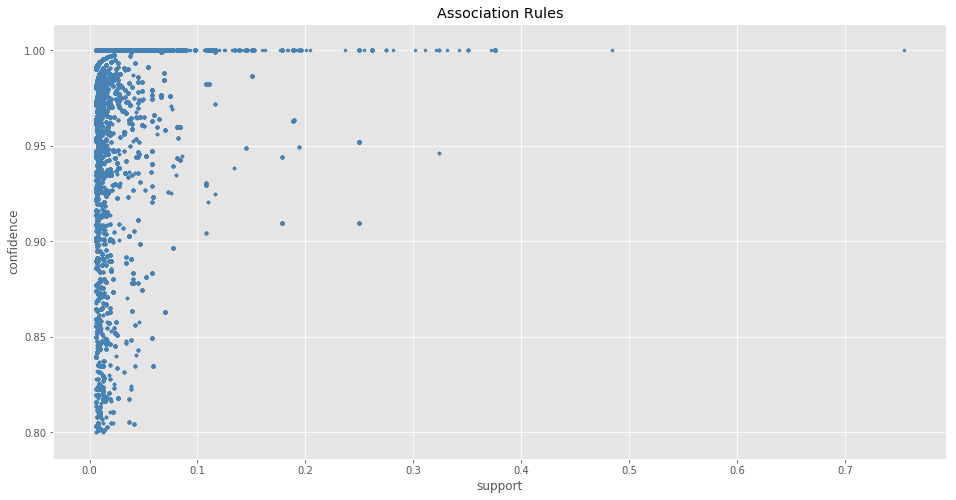

In [97]:
# 绘制support、confidence散点图
plt.figure(figsize=(16,8))
plt.style.use('ggplot')

plt.scatter(x=res['support'], y=res['confidence'], marker='.',color = 'steelblue')

plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()